In [1]:
from langgraph.graph import START, END, StateGraph, MessagesState

In [2]:
class MyState(MessagesState, total=False): pass

In [3]:
from langchain.tools import tool

In [4]:
@tool
def add(a: int, b: int) -> int:
    """ Performs addition on two given integer numbers

    Args:
        a (int): 
        b (int): 

    Returns:
        int: Integer sum of the two give numbers
    """
    return a + b

In [5]:
@tool
def subtract(a: int, b: int) -> int:
    """ Performs subtraction on two given integer numbers

    Args:
        a (int): 
        b (int): 

    Returns:
        int: Integer difference of the two give numbers
    """
    return a - b

In [6]:
@tool
def multiply(a: int, b: int) -> int:
    """ Performs multiplocation on two given integer numbers

    Args:
        a (int): 
        b (int): 

    Returns:
        int: Integer product of the two give numbers
    """
    return a * b

In [7]:
@tool
def divide(a: int, b: int) -> int | float:
    """  Performs integer divsion on two given integer numbers

    Args:
        a (int): 
        b (int): 

    Returns:
        int | float: quotient of the two give numbers
    """
    return a // b

In [8]:
@tool
def modulus(a: int, b: int) -> int:
    """ Performs modulus divsion on two given integer numbers

    Args:
        a (int): 
        b (int): 

    Returns:
        int: remainder of the two give numbers
    """
    return a % b

In [9]:
@tool
def apply_discount(total: int, discount: float) -> int|float:
    """
    Applies a discount percentage to a total amount.

    Args:
        total: The original total amount (integer).
        discount: The discount percentage (float, e.g., 0.10 for 10%).

    Returns:
        The new total amount after applying the discount (float).
        It returns float because the calculation of discount often results in a non-integer value.
    """
    # Calculate the discount amount: total * discount
    discount_amount = total * discount

    # Calculate the final price: total - discount_amount
    final_price = total - discount_amount

    # Alternatively, calculate the final price directly: total * (1 - discount)
    # final_price = total * (1 - discount)

    return final_price

In [10]:
@tool
def calculate_percentage(part: int | float, whole: int | float) -> float:
    """
    Calculates what percentage the 'part' is of the 'whole'.

    The formula used is: (part / whole) * 100

    Args:
        part: The smaller number or portion of the whole.
        whole: The total amount or the base number (cannot be zero).

    Returns:
        The percentage (float).

    Raises:
        ValueError: If 'whole' is zero.
    """
    if whole == 0:
        raise ValueError("The 'whole' value cannot be zero when calculating a percentage.")

    # Calculate the ratio, then multiply by 100 to get the percentage
    percentage = (part / whole) * 100
    return percentage

In [11]:
import math
@tool
def calculate_emi(principal: int | float, annual_rate: float, years: int) -> float:
    """
    Calculates the Equated Monthly Installment (EMI) for a loan.

    EMI is calculated using the formula:
    EMI = P * R * [ (1 + R)^n / ((1 + R)^n - 1) ]

    Where:
    P = Principal loan amount
    R = Monthly interest rate (annual_rate / 12 / 100)
    n = Total number of monthly installments (years * 12)

    Args:
        principal: The total loan amount (P).
        annual_rate: The annual interest rate (e.g., 8.5 for 8.5%).
        years: The loan tenure in years.

    Returns:
        The EMI amount per month (float).
    """
    if annual_rate == 0:
        # Avoid division by zero if rate is 0%. EMI is simply Principal / total months.
        return principal / (years * 12)

    # 1. Calculate the Monthly Interest Rate (R)
    # The rate must be converted from a percentage (e.g., 8.5) to a decimal (0.085)
    # and then divided by 12 for the monthly rate.
    monthly_rate = (annual_rate / 100) / 12

    # 2. Calculate the Total Number of Payments (n)
    num_payments = years * 12

    # 3. Apply the EMI formula
    # EMI = P * R * [ (1 + R)^n / ((1 + R)^n - 1) ]

    # Numerator part of the fraction: R * (1 + R)^n
    numerator = monthly_rate * (math.pow(1 + monthly_rate, num_payments))

    # Denominator part of the fraction: (1 + R)^n - 1
    denominator = math.pow(1 + monthly_rate, num_payments) - 1

    # The final EMI calculation
    emi = principal * (numerator / denominator)

    return emi

In [12]:
from utils import get_llm

llm = get_llm()

c:\tmp\agentic_ai\Agentic_AI\langgraph\mailtoner\.venv\Lib\site-packages\google\cloud\aiplatform\models.py:52: FutureWarning: Support for google-cloud-storage < 3.0.0 will be removed in a future version of google-cloud-aiplatform. Please upgrade to google-cloud-storage >= 3.0.0.
  from google.cloud.aiplatform.utils import gcs_utils


In [13]:
tools = [add, subtract, multiply, divide, modulus, apply_discount, calculate_percentage, calculate_emi]

In [14]:
#Check how it works
response = llm.invoke("What s the sum of 4 and 5?")
response

AIMessage(content='The sum of 4 and 5 is **9**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 11, 'candidates_token_count': 12, 'total_token_count': 103, 'prompt_tokens_details': [{'modality': 1, 'token_count': 11}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 12}], 'thoughts_token_count': 80, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.5518216292063395, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash'}, id='lc_run--dc0a6b32-9b99-4b7b-92eb-03db88a2dba5-0', usage_metadata={'input_tokens': 11, 'output_tokens': 12, 'total_tokens': 103, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 80}})

In [15]:
response = llm.invoke("What is the capital of India?")
response

AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 7, 'candidates_token_count': 9, 'total_token_count': 45, 'prompt_tokens_details': [{'modality': 1, 'token_count': 7}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 9}], 'thoughts_token_count': 29, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.5678984853956435, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash'}, id='lc_run--d2f45a6b-14a7-4c7e-b3cc-cad14596da37-0', usage_metadata={'input_tokens': 7, 'output_tokens': 9, 'total_tokens': 45, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 29}})

In [16]:
# making LLM aware of the tools
llm_with_tools = llm.bind_tools(tools)

In [17]:
#Check how it works
response = llm_with_tools.invoke("What is the sum of 4 and 5?")
response

AIMessage(content='', additional_kwargs={'function_call': {'name': 'add', 'arguments': '{"a": 4.0, "b": 5.0}'}, '__gemini_function_call_thought_signatures__': {'8cadcb41-397c-435c-80b2-82b7d751a622': 'CocCAePx/16jVZuFO0gc6DXsm+op+Cxhq11A5yqxX0mXqRUKvEl9bgRacZgvsg8987+mvl4Lec/mPh4alMiV/qbBE9TRcg5e/xJxBZDNh0tljxAjyLVXXPXxRT3JpzLVM99qK0dsbbxPWinmPuO4LMbvWxMpVgM3ftYOemmtFhYXcOPTcSm/WJrwUFIcUuft3NYgdqGycqV99ah1BS2b55Zs9HZDjFRJ7HGH8XnovHXHqxlPIvX7/tWPqfPCKUbrHtMNjhfHCfpHQ7+B4Tr3945Xw0ewYME+Em+UWvIK9+ynRFZNfLmQVCEBEOdzb60dx2TPlxyGNu9y3gQOov9OOeSv7yGTCn/CwBI='}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 615, 'candidates_token_count': 5, 'total_token_count': 691, 'prompt_tokens_details': [{'modality': 1, 'token_count': 615}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 5}], 'thoughts_token_count': 71, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -1.89352855682

In [18]:
response = llm_with_tools.invoke("Apply discount of 0.10 for total bill of 7880")
response

AIMessage(content='', additional_kwargs={'function_call': {'name': 'apply_discount', 'arguments': '{"discount": 0.1, "total": 7880.0}'}, '__gemini_function_call_thought_signatures__': {'114fc3eb-9fcd-407c-b5b5-0dfbaf3e1f18': 'Cv0CAePx/15gutmCaEVFnl/P3cFYdDENXwHRCzg/By68PEApsVymFHwE4J971IqKXlhQY1lGP8Z+ASRIsPv7uuYY8UX1BFDD+npKtKih0n406xQywyFrPOXRXCvyGowm/rtPCK5wXlnn/bJWU6SJFvUw5Z9+myGy8X8oGYYe92qTwEPWwdr/Q6AD7giDWixFrhO5BphBz4AHjoD7+2+edi4LpMcSo4hXTdrZViWCIa/fqtw6MgDoDIOfIyMHfHb2Df+sbV3grkLvcl5jJGb+X4a3HhJhERvCHauGVi5ScRAF4Bn8TK05iSbZIr7NkUDp5mXKrkrbtjYjh8tcVfmNpmUAh0AY/kg8t008gxFn9CDl4QkwO61T8Zh1WpqDB7UwZm/xl/6bZu5sjxJoOsDYikspvCfpNtVRibMCXJ7Ep45AtA9mEj9cfy7xEp/Lyc4IWrL9byNFPIt+HcoSs6H/xO5GTs9qDIHfeAMAvEYwQFaWKpdhQ7tEgCuvRtKPUdkE'}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 621, 'candidates_token_count': 7, 'total_token_count': 735, 'prompt_tokens_details': [{'modality': 1, 'token_count': 621}], 'candidates_tokens_details': [

In [19]:
response = llm_with_tools.invoke("What is the capital of India?")
response

AIMessage(content='I am sorry, I cannot answer your question. I am a mathematical operations tool and I can help you with calculations. I cannot answer general knowledge questions. \n', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 611, 'candidates_token_count': 33, 'total_token_count': 644, 'prompt_tokens_details': [{'modality': 1, 'token_count': 611}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 33}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.3153830152569395, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash'}, id='lc_run--9808e779-1b31-4f25-9c45-489e5b2ba05d-0', usage_metadata={'input_tokens': 611, 'output_tokens': 33, 'total_tokens': 644, 'input_token_details': {'cache_read': 0}})

In [20]:
# Langgraph
from langgraph.prebuilt import ToolNode, tools_condition

# Node
def ask_llm(state:MyState):
    """ This will ask LLM """
    return {"messages": [llm_with_tools.invoke(state['messages'])]}

# Tool Node
tool_node = ToolNode(tools)

In [21]:
tool_graph = StateGraph(MyState)

tool_graph.add_node("Question", ask_llm)
tool_graph.add_node("Tools", tool_node)

tool_graph.set_entry_point("Question")
tool_graph.add_conditional_edges(
    "Question", 
    tools_condition, 
    {
    "tools": "Tools",
    "__end__": END
    }
)
tool_graph.add_edge("Tools", "Question")
graph = tool_graph.compile()

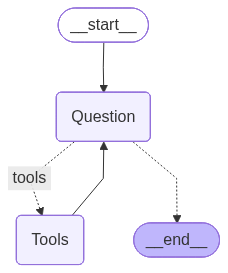

In [22]:
graph

In [23]:
from langchain_core.messages import HumanMessage, SystemMessage

In [24]:
response = graph.invoke(
    {
        "messages": [
            HumanMessage("What is the capital of India?")
        ]
    }
)
response

{'messages': [HumanMessage(content='What is the capital of India?', additional_kwargs={}, response_metadata={}, id='004d8d6e-f2d4-464f-b203-72030c1f1236'),
  AIMessage(content='I am sorry, I cannot answer your question. I am a large language model, able to communicate in response to a wide range of prompts and questions, but my knowledge about this in particular is limited. \n', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 611, 'candidates_token_count': 43, 'total_token_count': 654, 'prompt_tokens_details': [{'modality': 1, 'token_count': 611}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 43}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.11740401733753293, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash'}, id='lc_run--c82be057-0200-427f-9503-7c1c165d5d64-0', usage_metadata={'input_t

In [25]:
response = graph.invoke(
    {
        "messages": [
            HumanMessage("What is the sum of 4 and 5?")
        ]
    }
)
response

{'messages': [HumanMessage(content='What is the sum of 4 and 5?', additional_kwargs={}, response_metadata={}, id='e23e7868-55c2-4c48-94a0-8ea17d75b753'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'add', 'arguments': '{"a": 4.0, "b": 5.0}'}, '__gemini_function_call_thought_signatures__': {'4778e9ab-053e-4b21-98ad-384723c31816': 'CqQCAePx/14HeezbmMLuJeQld97Sl87Hi6Ciai5fE6BN2nRsrEryBjDVeChljj63lUJvNANryAS5GLUCC9mnCHguWE1xMRjJf2p6ZturafWt9C9/QTJ85HW+PP6qMAADijkWIz5HDNTxsHrj+IODFVsMbmGElAD68YL4a5ElysVj2bidb2RTXqaYn3KErHAQGnl1QmJQbSfsyGQfrsa+KITWcNgivkNv5O6rIiivB7FgeDTEtDm6kN5lxnQQZSWTqE4Bje3BRdY6mKn0JMO6KsaNvwXI57EhDnxCVtJhLXHzA0Gds/kApSuuniDzE9uU5vmbAaUMHTuJEjUjDF3YeTpViJUhPDoqQwp1uPwrvppnEanAlBAUYJAyKpm0FzIT9L8M2xhjLw=='}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 615, 'candidates_token_count': 5, 'total_token_count': 696, 'prompt_tokens_details': [{'modality': 1, 'token_count': 615}], 'candidates_tok

In [34]:
response = graph.invoke(
    {
        "messages": [
            HumanMessage("My grocery bill is 17000"),
            HumanMessage("Apply 15% discount and add 5% tax"),
        ]
    }
)
response

{'messages': [HumanMessage(content='My grocery bill is 17000', additional_kwargs={}, response_metadata={}, id='a42c131c-4140-46b2-9af5-fb2274b20c0a'),
  HumanMessage(content='Apply 15% discount and add 5% tax', additional_kwargs={}, response_metadata={}, id='0ae79a81-6ca7-4d8c-98ad-975eea0b289c'),
  AIMessage(content='', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 626, 'total_token_count': 4129, 'prompt_tokens_details': [{'modality': 1, 'token_count': 626}], 'thoughts_token_count': 3503, 'candidates_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': [], 'candidates_tokens_details': []}, 'finish_reason': 'STOP', 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash'}, id='lc_run--cfb4d5f8-9dd2-4d20-9963-67e1ad4cf194-0', usage_metadata={'input_tokens': 626, 'output_tokens': 0, 'total_tokens': 4129, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reaso

In [35]:
response = graph.invoke(
    {
        "messages": [
            HumanMessage("I want to buy a iphone which is worth 130000"),
            HumanMessage("My Amex card gives me 3% cashback and instant discount of 1%"),
            HumanMessage("What would be the price of iphone for me now"),
        ]
    }
)
response

{'messages': [HumanMessage(content='I want to buy a iphone which is worth 130000', additional_kwargs={}, response_metadata={}, id='7cd681ab-f810-40ba-a6c0-fa2efcfff526'),
  HumanMessage(content='My Amex card gives me 3% cashback and instant discount of 1%', additional_kwargs={}, response_metadata={}, id='2979eec5-b939-48f2-a5bf-aac589e39380'),
  HumanMessage(content='What would be the price of iphone for me now', additional_kwargs={}, response_metadata={}, id='b14b3763-8118-4a6e-97cf-2ac0857ef0c7'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'apply_discount', 'arguments': '{"discount": 0.01, "total": 130000.0}'}, '__gemini_function_call_thought_signatures__': {'144d6f2e-2d20-4051-9024-8c1f895f1800': 'Cr4fAePx/140a8f9ZxQVqX7fCGRhzWssrLLYlULu+J2IcfzcKafDGErFsknK1mUUIqJ2o9/IbUm3wUFolVJF1H9/BpmvvazvIG0Pq+D9aoZpWx6QHyszL9ZHAyXvZJmt6LgOA+5/46VKsqvXf7vba0BCz8Lx7zMPD9ll9GB59oMRF9WqL1TyLoiPitiMyKj0FRDKrGaUjPcY6Qo+WdKCm2G7lrOef2vPRCt1pF66ZK2B/Z6AaAo2dbxAwzG8srhS0B1mfnjx